In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
from matplotlib import pyplot
from sklearn.cluster import DBSCAN, KMeans

In [2]:
data="C:/Users/Singh/Downloads/mall.csv"
mall=pd.read_csv(data)

In [3]:
mall

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [4]:
mall.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [5]:
mall.dtypes

CustomerID                 int64
Genre                     object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [6]:
mall = mall.rename(columns = {"Genre":"Gender"})

In [7]:
mall.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [8]:
# Data Exploring:-

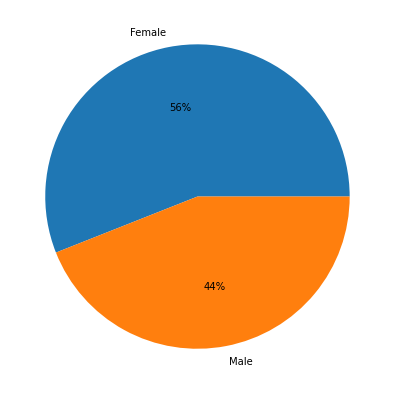

In [9]:
item1=mall['Gender'].value_counts()
fig = plt.figure(figsize =(10, 7))
plt.pie(item1, labels = item1.index,autopct = '%.f%%')
 
# show plot
plt.show()

<AxesSubplot:xlabel='Age', ylabel='Annual Income (k$)'>

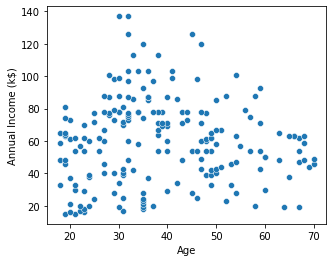

In [10]:
import seaborn as sns
fig = plt.figure(figsize =(5,4))
sns.scatterplot(data=mall,x='Age',y='Annual Income (k$)')

<AxesSubplot:xlabel='Age', ylabel='Annual Income (k$)'>

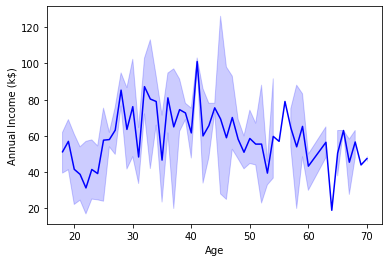

In [11]:
sns.lineplot(x=mall['Age'],y=mall['Annual Income (k$)'],color = 'blue')

<AxesSubplot:xlabel='Spending Score (1-100)', ylabel='Annual Income (k$)'>

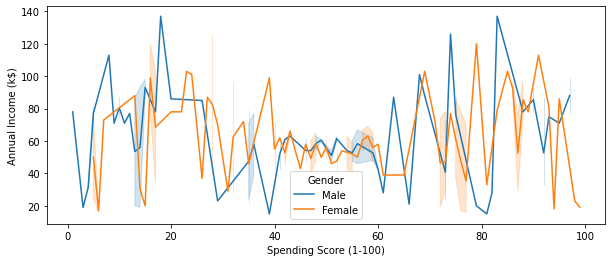

In [12]:
fig = plt.figure(figsize =(10,4))
sns.lineplot(data=mall,x='Spending Score (1-100)',y='Annual Income (k$)',hue='Gender')


<AxesSubplot:xlabel='Gender', ylabel='Spending Score (1-100)'>

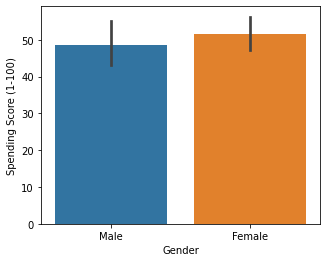

In [13]:
fig = plt.figure(figsize =(5,4))
sns.barplot(data=mall,x='Gender',y='Spending Score (1-100)')

<AxesSubplot:xlabel='Gender', ylabel='Annual Income (k$)'>

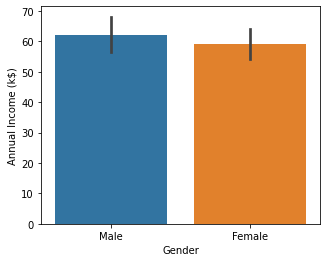

In [14]:
fig = plt.figure(figsize =(5,4))
sns.barplot(data=mall,x='Gender',y='Annual Income (k$)')

<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

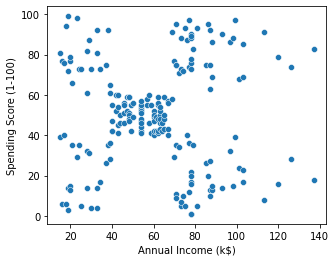

In [64]:
fig = plt.figure(figsize =(5,4))
sns.scatterplot(data=mall,x='Annual Income (k$)',y='Spending Score (1-100)')

<AxesSubplot:xlabel='Age', ylabel='Spending Score (1-100)'>

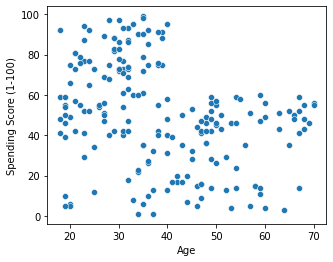

In [15]:
fig = plt.figure(figsize =(5,4))
sns.scatterplot(data=mall,x='Age',y='Spending Score (1-100)')

<AxesSubplot:xlabel='Age', ylabel='Count'>

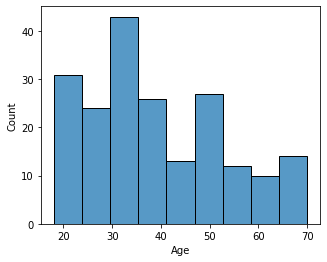

In [16]:
fig = plt.figure(figsize =(5,4))
sns.histplot(mall['Age'])

In [17]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
mall['Gender']=mall['Gender'].astype("category")
mall['Gender']= label_encoder.fit_transform(mall['Gender'])

In [18]:
mall=mall.drop("CustomerID",axis=1)

In [19]:
mall

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40
...,...,...,...,...
195,0,35,120,79
196,0,45,126,28
197,1,32,126,74
198,1,32,137,18


In [20]:
age=mall.iloc[:,[1,3]].values
income=mall.iloc[:,[2,3]].values

### Kmeans clustering

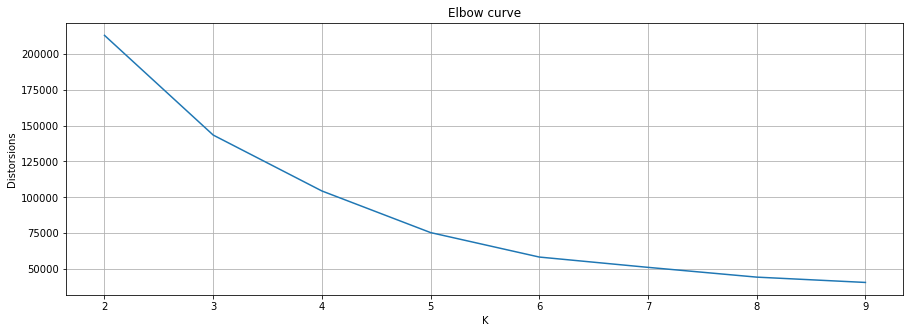

In [21]:
distorsions = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(mall)
    distorsions.append(kmeans.inertia_)

fig = plt.figure(figsize=(15, 5))
plt.plot(range(2, 10), distorsions)
plt.grid(True)
plt.xlabel('K')
plt.ylabel('Distorsions')
plt.title('Elbow curve');

In [22]:
def distorsion(data):
    distorsions = []
    for k in range(2,20,2):
        kmeans = KMeans(n_clusters=k)
        kmeans.fit(data)
        distorsions.append(kmeans.inertia_)

    fig = plt.figure(figsize=(15, 5))
    plt.plot(range(2,20,2), distorsions)
    plt.grid(True)
    plt.xlabel('K')
    plt.ylabel('Distorsions')
    plt.title('Elbow curve');
    
from sklearn.metrics import silhouette_samples, silhouette_score

def clusters(data):
    for n_clusters in range (2,20,2):
        clusterer = KMeans(n_clusters=n_clusters, random_state=10)
        cluster_labels = clusterer.fit_predict(data)
        silhouette_avg = silhouette_score(data, cluster_labels)
        print("For n_clusters =", n_clusters,
            "The average silhouette_score is :", silhouette_avg) 

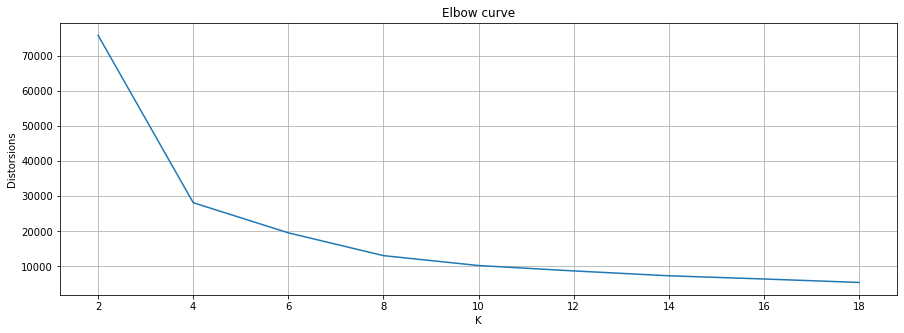

In [23]:
distorsion(age)


In [24]:
clusters(age)

For n_clusters = 2 The average silhouette_score is : 0.4692341232501655
For n_clusters = 4 The average silhouette_score is : 0.49973941540141753
For n_clusters = 6 The average silhouette_score is : 0.4376185638584134
For n_clusters = 8 The average silhouette_score is : 0.4304921688137185
For n_clusters = 10 The average silhouette_score is : 0.40542078190094527
For n_clusters = 12 The average silhouette_score is : 0.40389092365398627
For n_clusters = 14 The average silhouette_score is : 0.4094048075198883
For n_clusters = 16 The average silhouette_score is : 0.39397363580757205
For n_clusters = 18 The average silhouette_score is : 0.4085372361355948


In [25]:
Kmeans_model = KMeans(n_clusters=4)
Kmeans_age=Kmeans_model.fit(age)
cluster_centroid = Kmeans_model.cluster_centers_
labels = Kmeans_model.labels_
kmeans_score = silhouette_score(age, labels)
kmeans_score

0.49973941540141753

In [26]:
results_wpca=list()
names=list()
results_wpca.append(kmeans_score)
names.append('kmeans')

In [27]:
def scatter_plot(x,y,label,xlabel1,ylabel1,title1):
    plt.figure(figsize =(6, 6))
    plt.scatter(x,y,c=label, cmap ='rainbow')
    plt.xlabel(xlabel1)
    plt.ylabel(ylabel1)
    plt.title(title1)
    plt.show()

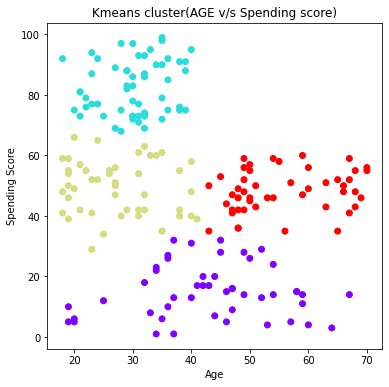

In [28]:
scatter_plot(mall['Age'],mall['Spending Score (1-100)'],labels,'Age','Spending Score','Kmeans cluster(AGE v/s Spending score)')

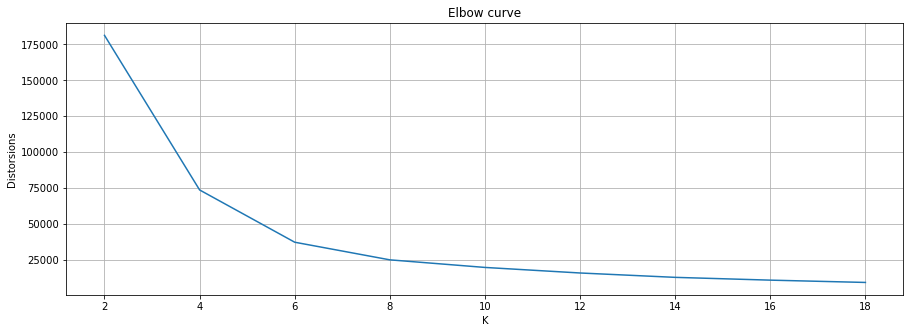

In [29]:
distorsion(income)

In [30]:
clusters(income)

For n_clusters = 2 The average silhouette_score is : 0.2968969162503008
For n_clusters = 4 The average silhouette_score is : 0.4931963109249047
For n_clusters = 6 The average silhouette_score is : 0.5376203956398481
For n_clusters = 8 The average silhouette_score is : 0.4572211842776841
For n_clusters = 10 The average silhouette_score is : 0.4467356774401869
For n_clusters = 12 The average silhouette_score is : 0.4267928147986293
For n_clusters = 14 The average silhouette_score is : 0.43623474793328404
For n_clusters = 16 The average silhouette_score is : 0.4177588115411932
For n_clusters = 18 The average silhouette_score is : 0.43386019711220697


In [31]:
Kmeans_model = KMeans(n_clusters=6)
y_means=Kmeans_model.fit(income)
cluster_centroid = Kmeans_model.cluster_centers_
labels_income = Kmeans_model.labels_
kmeans_income_score = silhouette_score(income, labels_income)
kmeans_income_score

0.5379675585622219

In [32]:
resultsss=list()
names1=list()
resultsss.append(kmeans_income_score)
names1.append('kmeans')

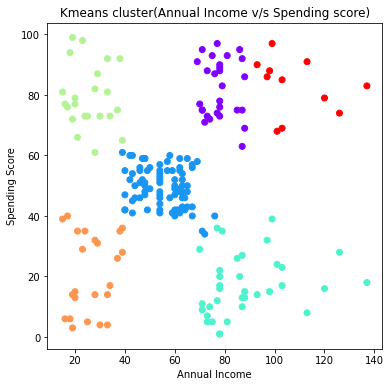

In [33]:
scatter_plot(mall['Annual Income (k$)'],mall['Spending Score (1-100)'],labels_income,'Annual Income','Spending Score','Kmeans cluster(Annual Income v/s Spending score)')

#### Agglomerative 

In [34]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

In [35]:
def dendogram(data,x):
    plt.figure(figsize=(30, 10))
    dendrogrm = sch.dendrogram(sch.linkage(data, method = 'ward'),labels=mall.index)
    ax = plt.gca()
    ax.tick_params(axis='x', which='major', labelsize=10)
    plt.title('Mall Dendrogram',fontsize=30)
    plt.xlabel(x,fontsize=20)
    plt.ylabel('Euclidean distance', fontsize=20)
    plt.show()

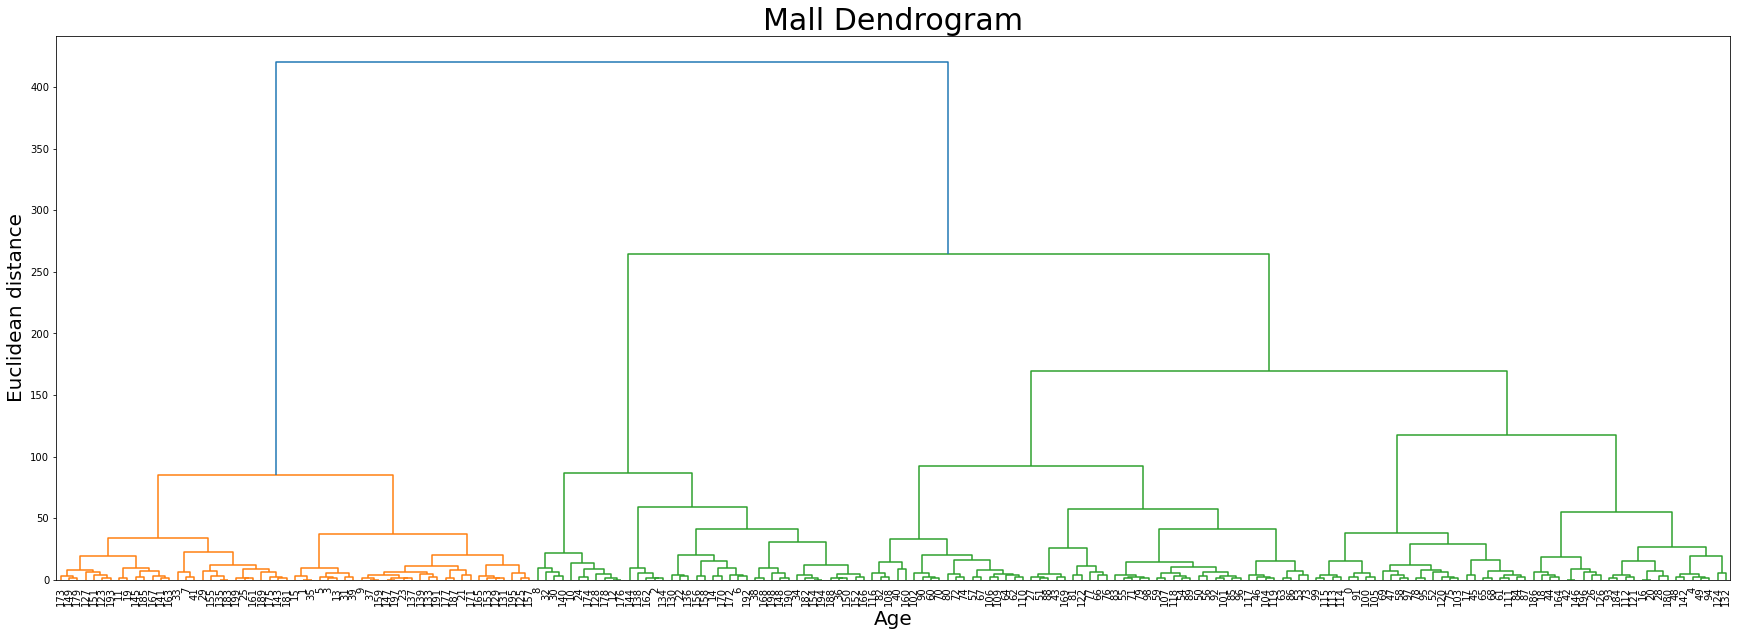

In [36]:
dendogram(age,'Age')

In [37]:
clusterer = AgglomerativeClustering(n_clusters=5, linkage='ward')
y_predict = clusterer.fit_predict(age)
cluster_labels = clusterer.labels_
silhouette_agglo = silhouette_score(age, cluster_labels)
silhouette_agglo

0.40374071753059787

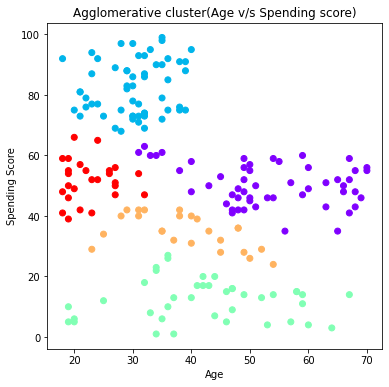

In [38]:
scatter_plot(mall['Age'],mall['Spending Score (1-100)'],cluster_labels,'Age','Spending Score','Agglomerative cluster(Age v/s Spending score)')

In [39]:
results_wpca.append(silhouette_agglo)
names.append('agglomerative')

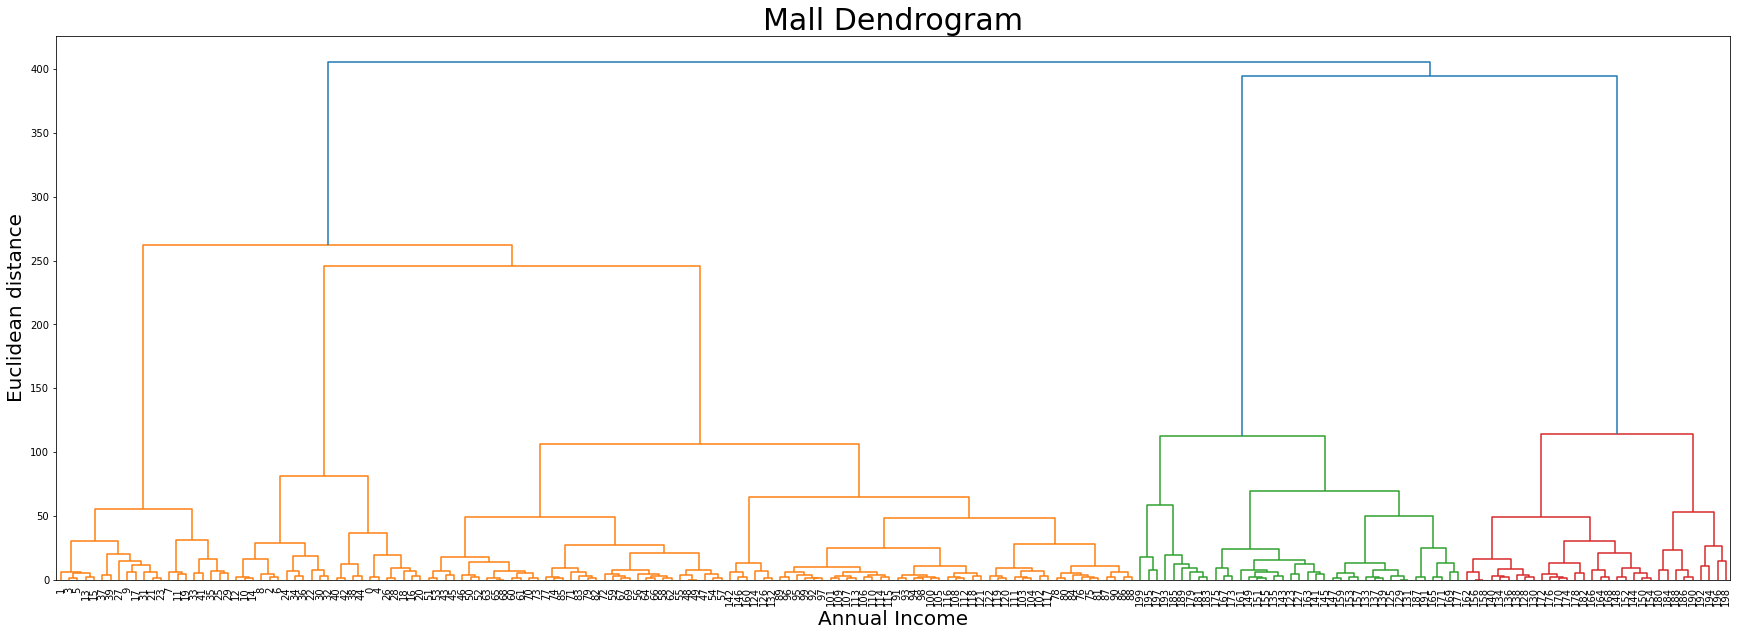

In [40]:
dendogram(income,'Annual Income')

In [41]:
clusterer1 = AgglomerativeClustering(n_clusters=6, linkage='ward')
y_predict = clusterer1.fit_predict(income)
cluster_labels1 = clusterer.labels_
silhouette_Income_agglo = silhouette_score(income, cluster_labels1)
silhouette_Income_agglo

0.048539936082848706

In [42]:

resultsss.append(silhouette_Income_agglo)
names1.append('Agglomerative')

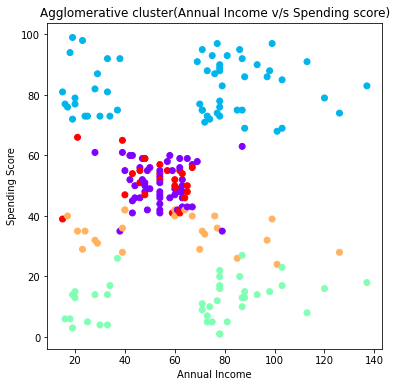

In [43]:
scatter_plot(mall['Annual Income (k$)'],mall['Spending Score (1-100)'],cluster_labels1,'Annual Income','Spending Score','Agglomerative cluster(Annual Income v/s Spending score)')

#### DBSCAN

In [44]:
import numpy as np
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=5)
nbrs = neigh.fit(age)
distances, indices = nbrs.kneighbors(age)

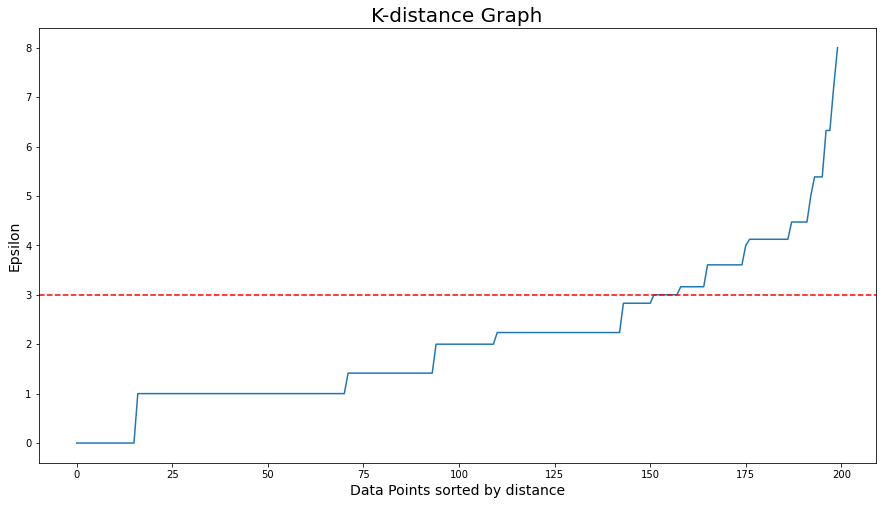

In [45]:
# Plotting K-distance Graph
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.figure(figsize=(15,8))
plt.plot(distances)
plt.axhline(y=3, color='r', linestyle='--')
plt.title('K-distance Graph',fontsize=20)
plt.xlabel('Data Points sorted by distance',fontsize=14)
plt.ylabel('Epsilon',fontsize=14)
plt.show()

In [46]:
eps=3
for min_samples in range(2,20,2):
    clusterer2 = DBSCAN(eps=eps, min_samples=min_samples)
    cluster_labels2 = clusterer2.fit_predict(age)

    x= cluster_labels2 +2
    y = np.bincount(x)
    ii = np.nonzero(y)[0]
    results = list(zip(ii,y[ii]) )
    print('eps=',eps,'| min_samples= ', min_samples, '| obtained clustering: ', results)

eps= 3 | min_samples=  2 | obtained clustering:  [(1, 42), (2, 2), (3, 8), (4, 3), (5, 5), (6, 2), (7, 2), (8, 10), (9, 2), (10, 4), (11, 2), (12, 2), (13, 2), (14, 2), (15, 9), (16, 5), (17, 4), (18, 5), (19, 2), (20, 2), (21, 2), (22, 4), (23, 3), (24, 16), (25, 7), (26, 3), (27, 6), (28, 2), (29, 2), (30, 5), (31, 2), (32, 4), (33, 4), (34, 2), (35, 6), (36, 2), (37, 4), (38, 3), (39, 2), (40, 2), (41, 2), (42, 2)]
eps= 3 | min_samples=  4 | obtained clustering:  [(1, 103), (2, 7), (3, 5), (4, 10), (5, 4), (6, 4), (7, 14), (8, 5), (9, 7), (10, 4), (11, 4), (12, 4), (13, 4), (14, 4), (15, 9), (16, 4), (17, 4), (18, 4)]
eps= 3 | min_samples=  6 | obtained clustering:  [(1, 170), (2, 10), (3, 6), (4, 8), (5, 6)]
eps= 3 | min_samples=  8 | obtained clustering:  [(1, 191), (2, 9)]
eps= 3 | min_samples=  10 | obtained clustering:  [(1, 200)]
eps= 3 | min_samples=  12 | obtained clustering:  [(1, 200)]
eps= 3 | min_samples=  14 | obtained clustering:  [(1, 200)]
eps= 3 | min_samples=  16 |

In [47]:
from sklearn.cluster import DBSCAN
dbscan_opt=DBSCAN(eps=3,min_samples=6)
dbscan_opt.fit(age)

DBSCAN(eps=3, min_samples=6)

In [48]:
mall['DBSCAN_opt_labels']=dbscan_opt.labels_
mall['DBSCAN_opt_labels'].value_counts()

-1    170
 0     10
 2      8
 1      6
 3      6
Name: DBSCAN_opt_labels, dtype: int64

In [49]:
from sklearn import metrics

Silhouette_dbscan=metrics.silhouette_score(age, mall['DBSCAN_opt_labels'])
Silhouette_dbscan

-0.2830824702199763

In [50]:
results_wpca.append(Silhouette_dbscan)
names.append('dbscan')

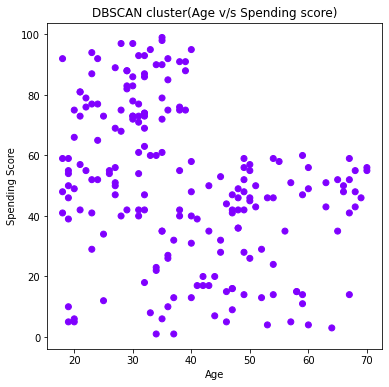

In [51]:
scatter_plot(mall['Age'],mall['Spending Score (1-100)'],cluster_labels2,'Age','Spending Score','DBSCAN cluster(Age v/s Spending score)')

In [52]:
#dbscan for income

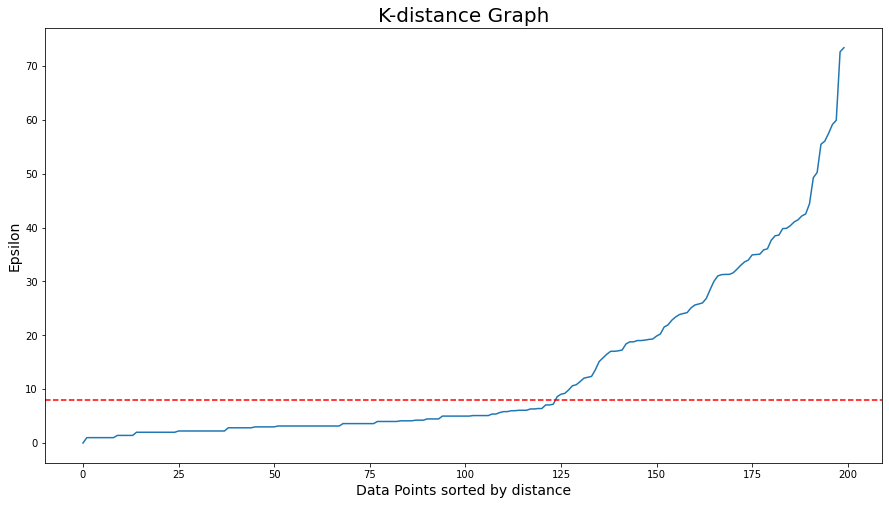

eps= 8 | min_samples=  2 | obtained clustering:  [(1, 8), (2, 7), (3, 17), (4, 9), (5, 3), (6, 3), (7, 89), (8, 32), (9, 26), (10, 2), (11, 2), (12, 2)]
eps= 8 | min_samples=  4 | obtained clustering:  [(1, 22), (2, 16), (3, 8), (4, 7), (5, 89), (6, 32), (7, 23), (8, 3)]
eps= 8 | min_samples=  6 | obtained clustering:  [(1, 47), (2, 10), (3, 6), (4, 88), (5, 26), (6, 23)]
eps= 8 | min_samples=  8 | obtained clustering:  [(1, 71), (2, 10), (3, 83), (4, 24), (5, 12)]
eps= 8 | min_samples=  10 | obtained clustering:  [(1, 85), (2, 83), (3, 12), (4, 10), (5, 10)]
eps= 8 | min_samples=  12 | obtained clustering:  [(1, 119), (2, 81)]
eps= 8 | min_samples=  14 | obtained clustering:  [(1, 121), (2, 79)]
eps= 8 | min_samples=  16 | obtained clustering:  [(1, 123), (2, 77)]
eps= 8 | min_samples=  18 | obtained clustering:  [(1, 123), (2, 77)]


In [53]:
neigh = NearestNeighbors(n_neighbors=5)
nbrs = neigh.fit(age)
distances, indices = nbrs.kneighbors(income)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.figure(figsize=(15,8))
plt.plot(distances)
plt.axhline(y=8, color='r', linestyle='--')
plt.title('K-distance Graph',fontsize=20)
plt.xlabel('Data Points sorted by distance',fontsize=14)
plt.ylabel('Epsilon',fontsize=14)
plt.show()

eps=8
for min_samples in range(2,20,2):
    clusterer3 = DBSCAN(eps=eps, min_samples=min_samples)
    cluster_labels3 = clusterer3.fit_predict(income)

    x= cluster_labels3 +2
    y = np.bincount(x)
    ii = np.nonzero(y)[0]
    results = list(zip(ii,y[ii]) )
    print('eps=',eps,'| min_samples= ', min_samples, '| obtained clustering: ', results)
    


In [54]:
dbscan_opt=DBSCAN(eps=8,min_samples=8)
dbscan_opt.fit(income)

DBSCAN(eps=8, min_samples=8)

In [55]:
mall['DBSCAN_opt_labels1']=dbscan_opt.labels_
mall['DBSCAN_opt_labels1'].value_counts()

 1    83
-1    71
 2    24
 3    12
 0    10
Name: DBSCAN_opt_labels1, dtype: int64

In [56]:
Silhouette__income_dbscan=metrics.silhouette_score(income, mall['DBSCAN_opt_labels1'])
Silhouette__income_dbscan

0.23130655888279378

In [57]:
resultsss.append(Silhouette__income_dbscan)
names1.append('DBSCAN')

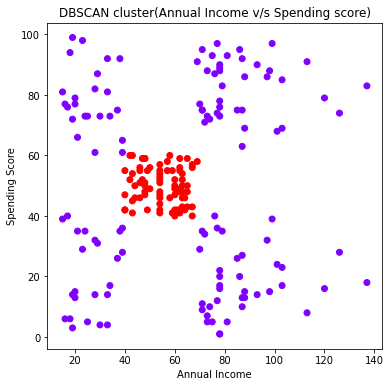

In [58]:
scatter_plot(mall['Annual Income (k$)'],mall['Spending Score (1-100)'],cluster_labels3,'Annual Income','Spending Score','DBSCAN cluster(Annual Income v/s Spending score)')

In [59]:
#Final Plot

In [60]:
#Age vs spending score

C:\Users\Singh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


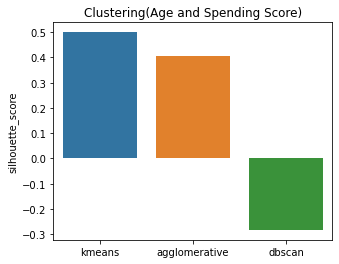

In [61]:
fig,ax=plt.subplots(figsize=(5,4))
sns.barplot(names,results_wpca );
plt.ylabel('silhouette_score')
plt.title('Clustering(Age and Spending Score)');

In [62]:
resultsss

[0.5379675585622219, 0.048539936082848706, 0.23130655888279378]

C:\Users\Singh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


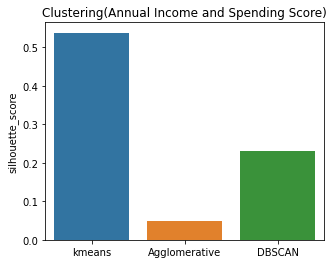

In [63]:
fig,ax=plt.subplots(figsize=(5,4))
sns.barplot(names1,resultsss );
plt.ylabel('silhouette_score')
plt.title('Clustering(Annual Income and Spending Score)');